In [1]:
!pip install networkx==2.6

You should consider upgrading via the 'C:\PythonFolder\NewsAggregator\venv\Scripts\python.exe -m pip install --upgrade pip' command.


# Plot Goldstein Score between countries

In [2]:
import glob, os
import json
import pandas as pd
from matplotlib import pyplot as plt
import networkx as nx
import scipy


In [3]:
#Reload final file
country_relations = pd.read_json("country_relations_final.json")
print(country_relations.shape)
country_relations.head()

(5075, 16)


,link,headline,category,short_description,authors,date,actor1,actor2,event_code,goldstein_score,nouns,actortext,actorroot,eventtext,issues,events
0,https://www.huffpost.com/entry/reporter-gets-a...,Reporter Gets Adorable Surprise From Her Boyfr...,U.S. NEWS,"""Who's that behind you?"" an anchor for New Yor...",Elyse Wanshel,2022-09-22,usa,---med,20,3.0,"[new york, usa, united, states, of, america, j...","[new york, journalist]","[united states of america, ---]",[asked],None,"[usa, ---med, 020]"
1,https://www.huffpost.com/entry/puerto-rico-wat...,Puerto Ricans Desperate For Water After Hurric...,WORLD NEWS,More than half a million people remained witho...,"DÁNICA COTO, AP",2022-09-22,---ppl,usa,180,-9.0,"[people, ~ppl, ~, u.s., usa, united, states, o...","[people, u.s.]","[---, united states of america]",[remained ... lashed],None,"[---ppl, usa, 180]"
2,https://www.huffpost.com/entry/russian-control...,4 Russian-Controlled Ukrainian Regions Schedul...,WORLD NEWS,The concerted and quickening Kremlin-backed ef...,"Jon Gambrell, AP",2022-09-20,ukr,rus,40,1.0,"[ukrainian, ukr, ukraine, russia, rus, russian...","[ukrainian, russia]","[ukraine, russian federation]",[schedule ... join],None,"[ukr, rus, 040]"
3,https://www.huffpost.com/entry/mark-frerichs-r...,Family Of American Held In Afghanistan Says He...,U.S. NEWS,"Mark Frerichs, a Navy veteran and civilian con...","Eric Tucker and Rahim Faiez, AP",2022-09-19,afg,---milcvl,181,-9.0,"[navy, civilian, ~milcvl, ~, ~, afghanistan, a...","[afghanistan, navy ... civilian]","[afghanistan, ---]",[<~milcvl> ... kidnapped in afg ... in <--->],None,"[afg, ---milcvl, 181]"
4,https://www.huffpost.com/entry/bc-as-pakistan-...,WHO Raises Alarm On Disease In Flood-hit Areas...,WORLD NEWS,The World Health Organization is raising the a...,"ZARAR KHAN, AP",2022-09-17,igounohlhwho,pakhlhlab,8,5.0,"[world health organization, igounohlhwho, worl...","[world health organization, ---]","[world health organization, ---]",[raising ... alarm],"[natural_disaster, 1]","[igounohlhwho, pakhlhlab, 08]"


In [4]:
subs = set(country_relations.actor1.unique())
subs2 = set(country_relations.actor2.unique())
subs = subs.union(subs2)

In [9]:

#Insert country codes here
country1 = 'rus'
country2 = 'ukr'


prefixes = [country1, country2]
c1_1 = country_relations['actor1'].str.startswith(country1)
c1_2 = country_relations['actor2'].str.startswith(country1)
result1 = country_relations.loc[~(c1_1 & c1_2)]

c2_1 = country_relations['actor1'].str.startswith(country2)
c2_2 = country_relations['actor2'].str.startswith(country2)
result2 = result1.loc[~(c2_1 & c2_2)]

c1 = result2['actor1'].str.startswith(tuple(prefixes))
c2 = result2['actor2'].str.startswith(tuple(prefixes))

result3 = result2.loc[(c1 & c2)]

print(result3.shape)
result3.head()

(16, 16)


,link,headline,category,short_description,authors,date,actor1,actor2,event_code,goldstein_score,nouns,actortext,actorroot,eventtext,issues,events
2,https://www.huffpost.com/entry/russian-control...,4 Russian-Controlled Ukrainian Regions Schedul...,WORLD NEWS,The concerted and quickening Kremlin-backed ef...,"Jon Gambrell, AP",2022-09-20,ukr,rus,40,1.0,"[ukrainian, ukr, ukraine, russia, rus, russian...","[ukrainian, russia]","[ukraine, russian federation]",[schedule ... join],None,"[ukr, rus, 040]"
8,https://www.huffpost.com/entry/ukraine-forces-...,Ukraine Claws Back Some Territory; Nuclear Pla...,WORLD NEWS,Ukrainian forces are claiming new success in t...,"HANNA ARHIROVA and YURAS KARMANAU, AP",2022-09-10,ukr,rus,13,0.4,"[ukrainian, ukr, ukraine, russian, rus, russia...","[ukrainian, russian]","[ukraine, russian federation]",[are claiming ... success],None,"[ukr, rus, 013]"
28,https://www.huffpost.com/entry/children-dead-u...,840 Children Wounded So Far In Russian Invasio...,WORLD NEWS,The head of Ukraine’s security council called ...,,2022-03-05,ukr,rus,20,3.0,"[ukraine, security council, ukr, igouno, ukrai...","[ukraine, russia, security council, russia]","[ukraine, russian federation, un security coun...","[called on, called on]",None,"[ukr, rus, 020, igouno, rus, 020]"
35,https://www.huffpost.com/entry/russia-ukraine-...,"Russia Hits Ukraine Fuel Suplies, Airfields In...",WORLD NEWS,Russian forces blew up a gas pipeline in Khark...,"Yuras Karmanau, Jim Heintz, Vladimir Isachenko...",2022-02-27,rus,ukr,190,-10.0,"[russian, rus, russian, federation, kharkiv, u...","[russian, kharkiv]","[russian federation, ukraine]","[<['blew',> <'up']>]",None,"[rus, ukr, 190]"
39,https://www.huffpost.com/entry/world-markets-r...,Russian Military Action In Ukraine Causes Oil ...,BUSINESS,Asian and European stock markets plunged and o...,"Joe McDonald, AP",2022-02-24,rus,ukr,190,-10.0,"[russia, rus, russian, federation, ukraine, uk...","[russia, ukraine]","[russian federation, ukraine]",[attacked],None,"[rus, ukr, 190]"


In [12]:
result3 = result3.sort_values(by = 'date')
result3.head()

,link,headline,category,short_description,authors,date,actor1,actor2,event_code,goldstein_score,nouns,actortext,actorroot,eventtext,issues,events
566,https://www.huffingtonpost.com/entry/putin-rus...,MH17 And The Long Term Costs Of Russia's Ukrai...,WORLDPOST,"Courtesy of Malaysia Airlines Flight 17, Putin...","Mark Galeotti, ContributorProfessor of Global ...",2014-07-20,rusgov,ukr,40,1.0,"[malaysia, airlines, mysbus, malaysia, ~, puti...","[putin, ukrainian]","[vladimir putin, ukraine]",[is ... coming to],None,"[rusgov, ukr, 040]"
509,https://www.huffingtonpost.com/entry/ukraine-r...,Top Ukraine Rebel Leader Says Troops Training ...,WORLDPOST,,,2014-08-16,ukrreb,rusmil,10,0.0,"[ukraine, rebel leader, ukrreb, ukraine, ~, tr...","[ukraine rebel leader, troops]","[ukraine, ]",[says],None,"[ukrreb, rusmil, 010]"
120,https://www.huffingtonpost.com/entry/poroshenk...,Ukraine's President Says Russian Opposition Le...,WORLDPOST,,,2015-02-28,ukrgov,rusoppreb,10,0.0,"[ukraine, president, ukrgov, ukraine, ~, russi...","[ukraine ... president, ---]","[ukraine, ---]",[says],None,"[ukrgov, rusoppreb, 010]"
4857,https://www.huffingtonpost.com/entry/ukraine-i...,Ukraine is no Greece or Puerto Rico and needs ...,WORLDPOST,"Greece is a deadbeat nation, Puerto Rico is a ...","Diane M. Francis, ContributorSenior Fellow Atl...",2015-07-06,ukr,rus,74,8.5,"[greece, grc, greece, ukraine, ukr, ukraine, r...","[ukraine, russia]","[ukraine, russian federation]",[made ... defend],None,"[ukr, rus, 074]"
2628,https://www.huffingtonpost.com/entry/denis-vor...,The Brazen Killing Of A Putin Critic Fuels Sus...,THE WORLDPOST,The former Russian member of parliament was fa...,Nick Robins-Early,2017-03-24,ukr,rusleg,190,-10.0,"[parliament, ~leg, ~, russian, member of parli...","[ukraine, russian member of parliament]","[ukraine, russian federation]",[<rusleg> ... shot in ... ukr],None,"[ukr, rusleg, 190]"


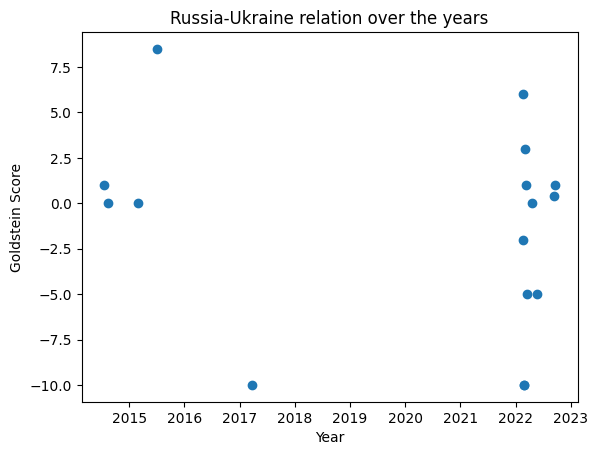

In [18]:
plt.scatter(result3['date'], result3['goldstein_score'])
plt.xlabel("Year")
plt.ylabel("Goldstein Score")
plt.title("Russia-Ukraine relation over the years")
plt.show()